# Diabetes Prediction Using Machine Learning

## Introduction
Diabetes is a common and serious health condition that can lead to complications such as heart disease, kidney failure, and nerve damage. Detecting it early can help with better management and treatment. In this project, I explored different machine learning techniques to predict whether a patient has diabetes based on health data.

## Project Objective
The goal of this project is to build and test different machine learning models using the PIMA Indians Diabetes Dataset. Initially, I started with basic models and later tried improving accuracy by testing different preprocessing techniques, feature engineering methods, and ensemble learning.

Throughout this process, I experimented with various approaches and analyzed their effectiveness. Some methods worked well, while others didn’t significantly improve performance. The objective is not just to achieve the highest accuracy but to understand **why** certain models perform better and how different techniques affect results.

## Outline of the Project
- **Step 1:** Load and explore the dataset  
- **Step 2:** Check for missing/incorrect values and clean the data  
- **Step 3:** Visualize the data using various charts (heatmaps, pair plots, KDE, box plots)  
- **Step 4:** Preprocess and split the data  
- **Step 5:** Train different models (Random Forest, Decision Tree, KNN, SVM, MLP) to establish baselines  
- **Step 6:** Test different feature engineering techniques (scaling, polynomial features, interactions)  
- **Step 7:** Experiment with ensemble models (Voting & Stacking)  
- **Step 8:** Perform hyperparameter tuning to optimize model performance  
- **Step 9:** Compare results, analyze errors, and conclude the best-performing approach  

This project was a great learning experience as I encountered different challenges along the way, such as handling missing values, choosing the right hyperparameters, and understanding feature importance. The final accuracy achieved is based on multiple trials, but further improvements could still be made.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PIMA Indians Diabetes Dataset (make sure "diabetes.csv" is in your working directory)
df = pd.read_csv("diabetes.csv")

# Display basic information
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset shape:", df.shape)


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)


In [2]:
# Check for missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# Check for 0 values in columns where 0 is likely an error (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print("\nCount of zeros in key columns:")
print((df[columns_to_check] == 0).sum())



Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Count of zeros in key columns:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [29]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

In [3]:
# Replace zeros with median (for columns where 0 is not a valid value)
columns_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in columns_to_fix:
    median_val = np.median(df[col][df[col] != 0])
    df[col] = df[col].replace(0, median_val)

# Verify that zeros are largely removed
print("\nAfter replacement, zero counts:")
print((df[columns_to_fix] == 0).sum())



After replacement, zero counts:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


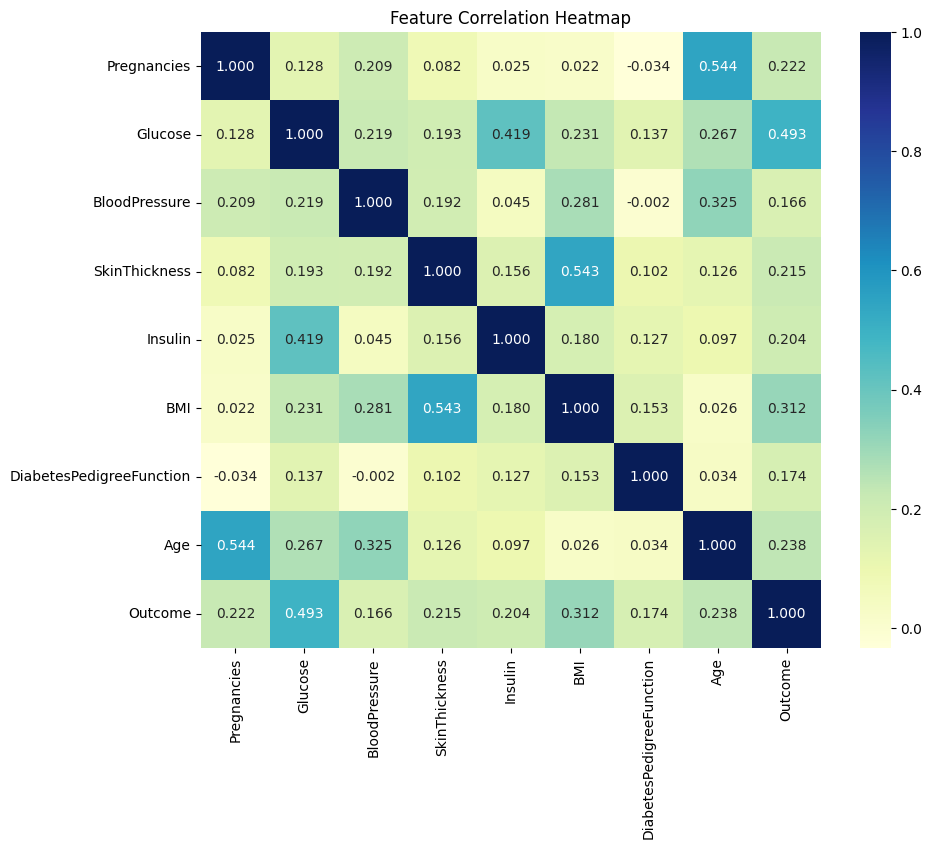

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()


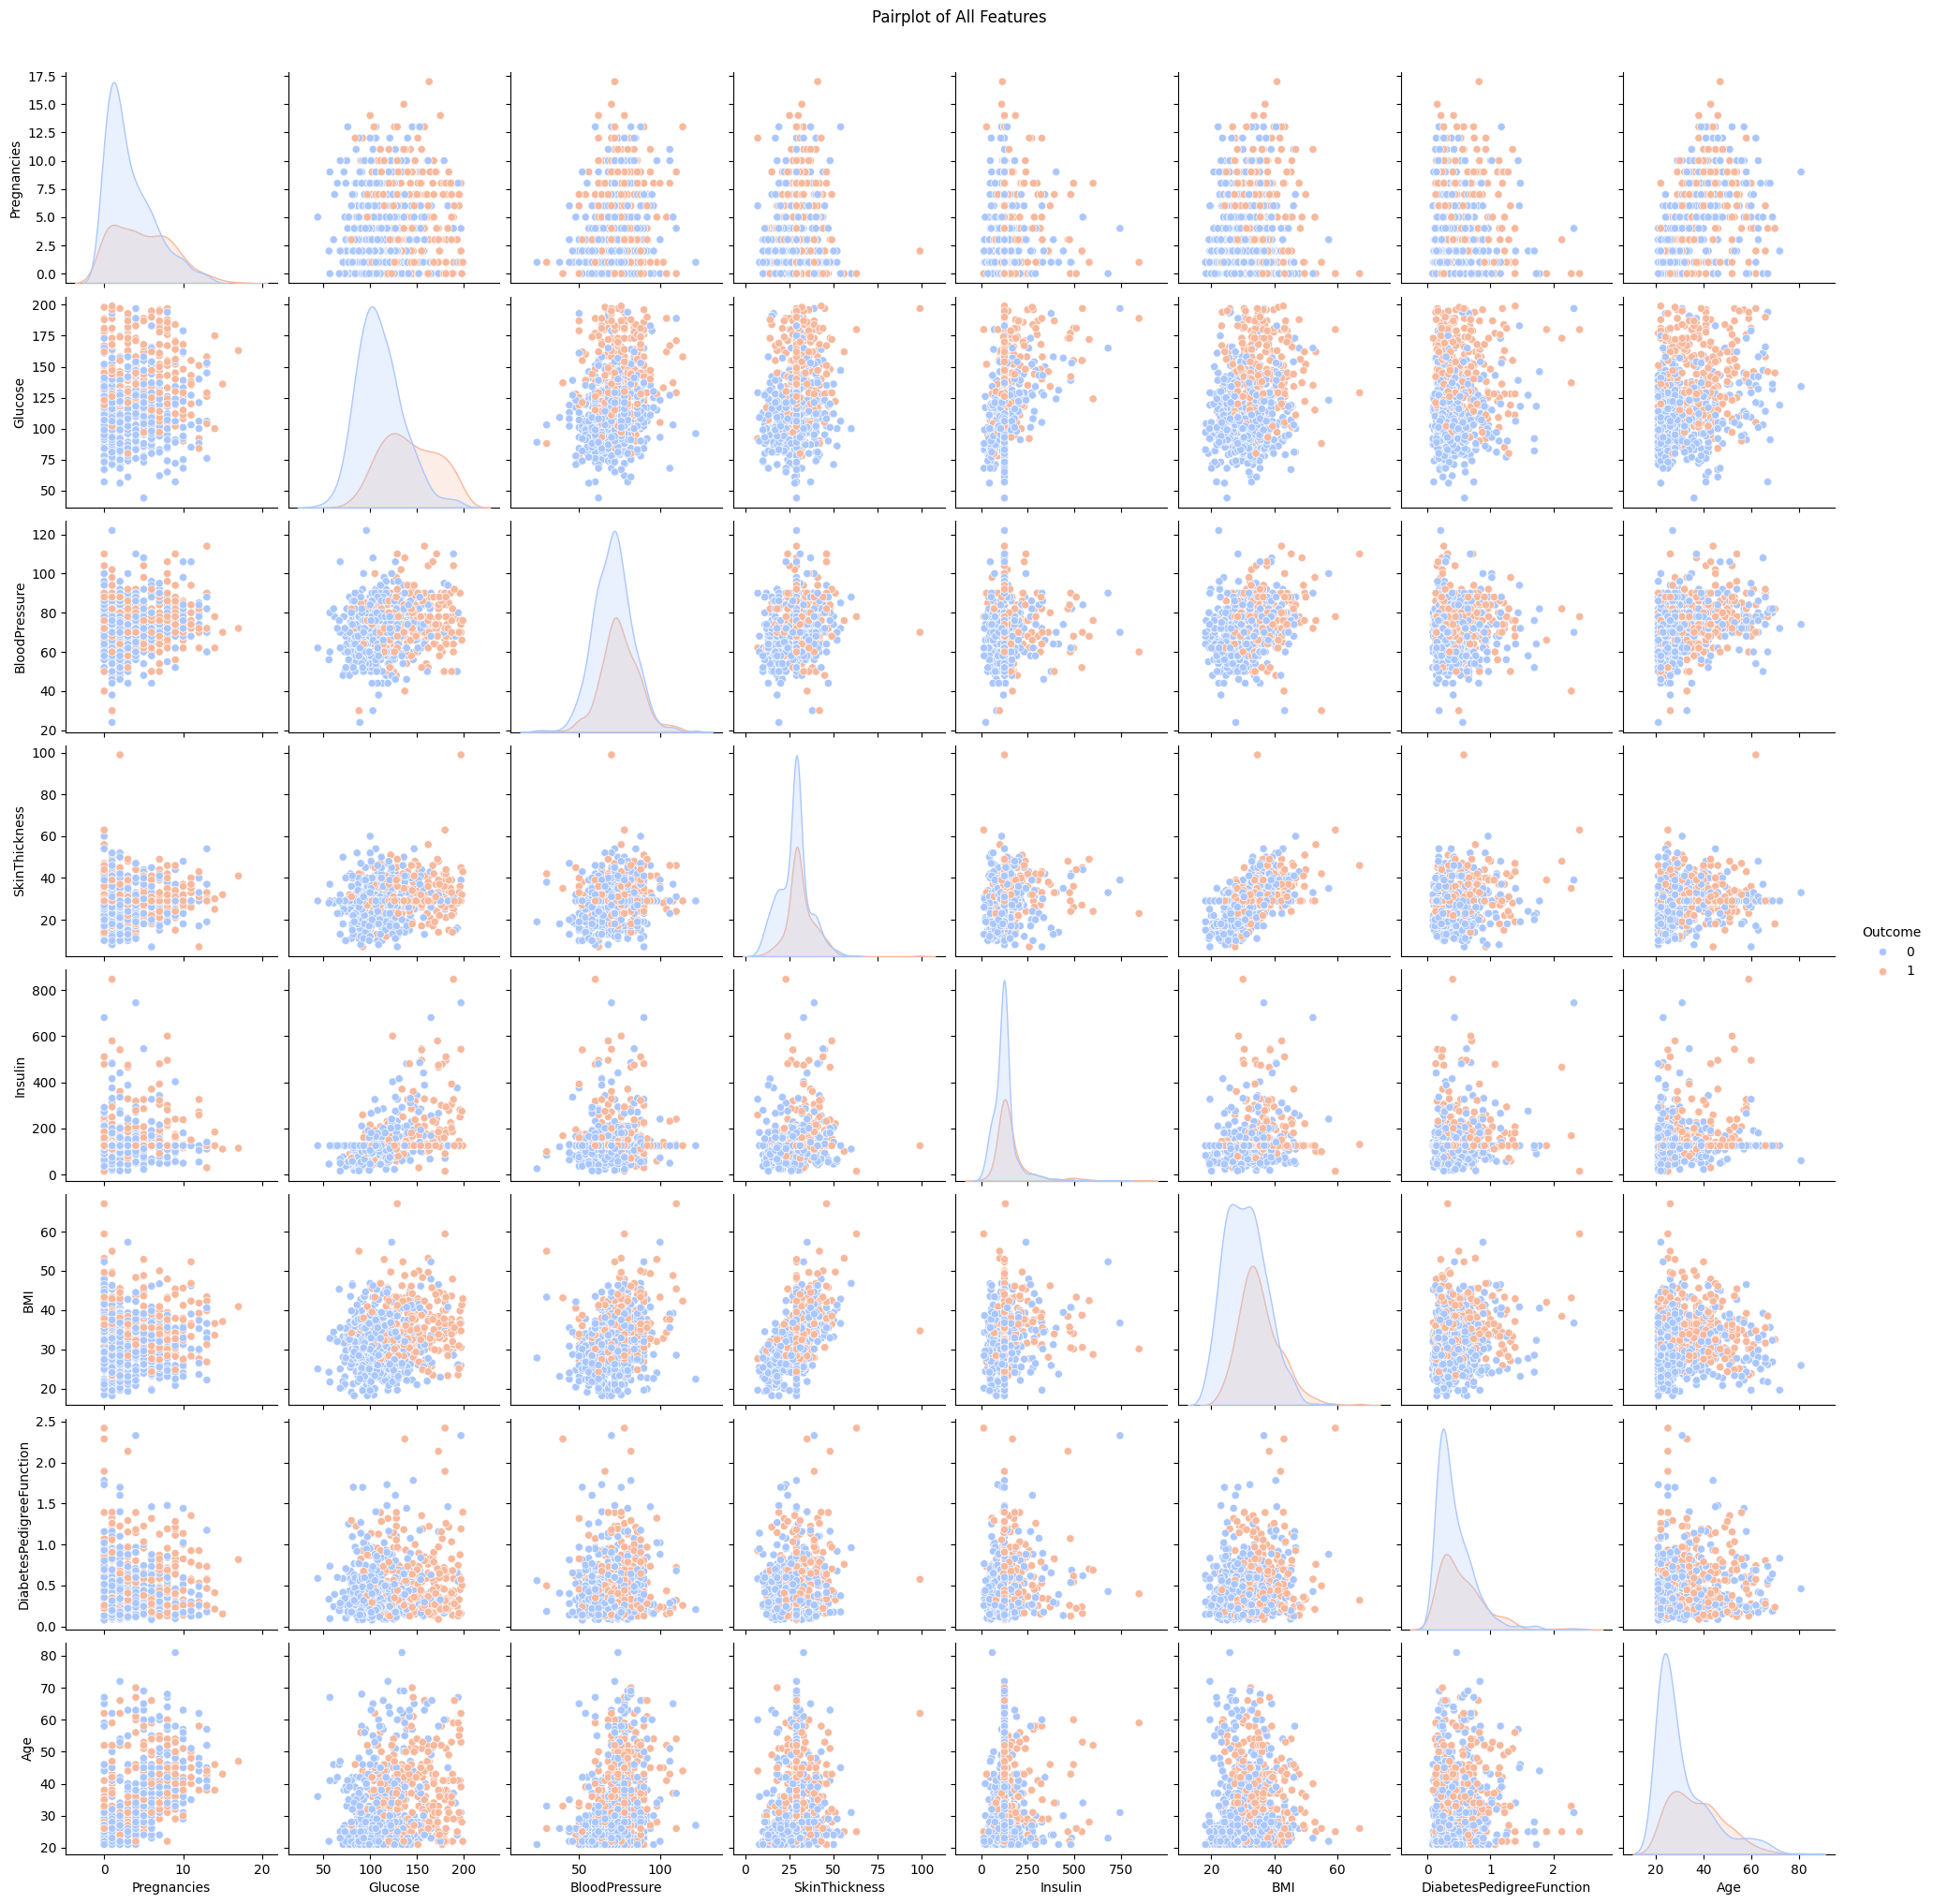

In [5]:
sns.pairplot(df, hue="Outcome", palette="coolwarm")
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()


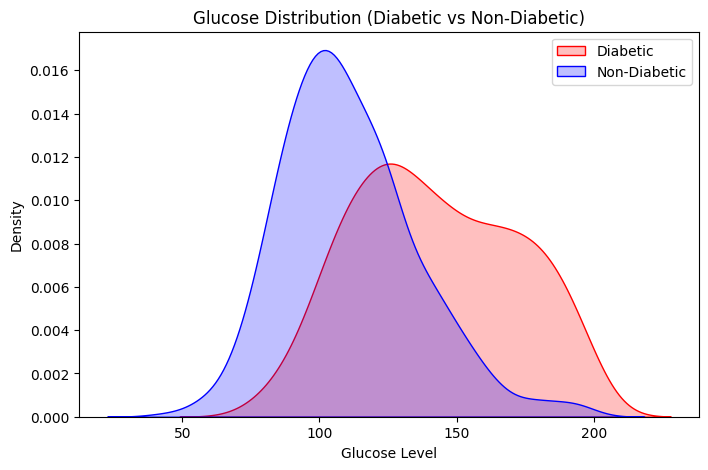

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Outcome'] == 1]['Glucose'], fill=True, color="red", label="Diabetic")
sns.kdeplot(df[df['Outcome'] == 0]['Glucose'], fill=True, color="blue", label="Non-Diabetic")
plt.xlabel("Glucose Level")
plt.ylabel("Density")
plt.title("Glucose Distribution (Diabetic vs Non-Diabetic)")
plt.legend()
plt.show()


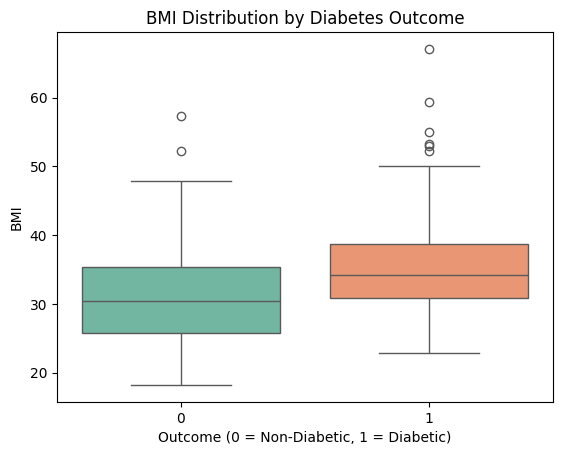

In [7]:
sns.boxplot(x="Outcome", y="BMI", data=df, hue="Outcome", palette="Set2")
plt.legend([], [], frameon=False)
plt.title("BMI Distribution by Diabetes Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("BMI")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM, MLP, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete. Ready for modeling!")


Data preprocessing complete. Ready for modeling!


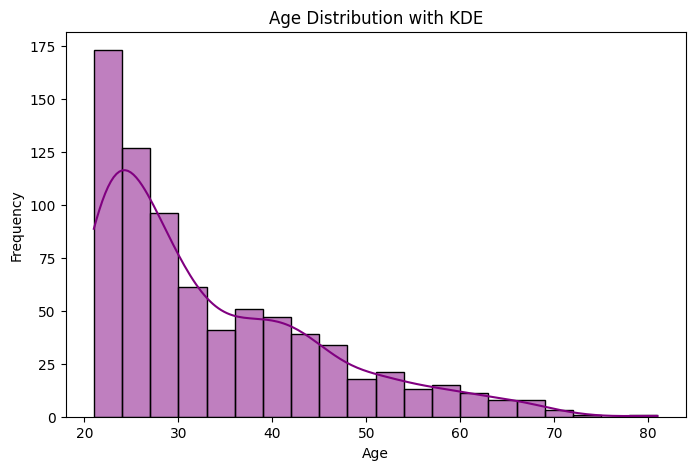

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title("Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


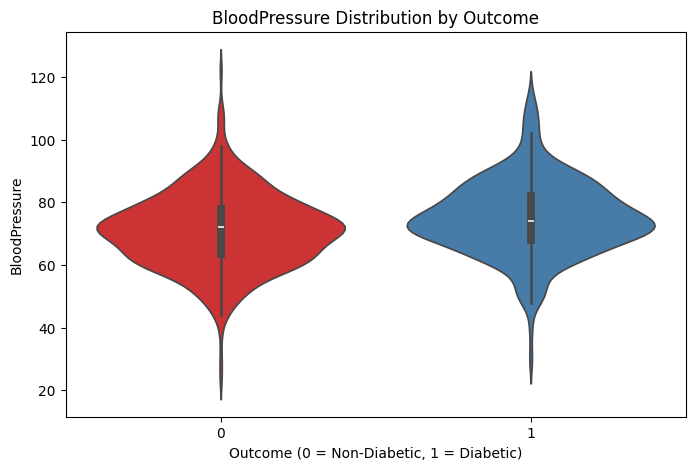

In [10]:
plt.figure(figsize=(8, 5))
# Use hue="Outcome" to split the data; remove the legend afterward for clarity
sns.violinplot(x="Outcome", y="BloodPressure", data=df, hue="Outcome", palette="Set1")
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.title("BloodPressure Distribution by Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("BloodPressure")
plt.show()


C:\Users\abhin\AppData\Local\Temp\ipykernel_17372\3698155038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Outcome", y="Insulin", data=df, palette="Set2")
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\abhin\AppData\Local\Packages\Pytho

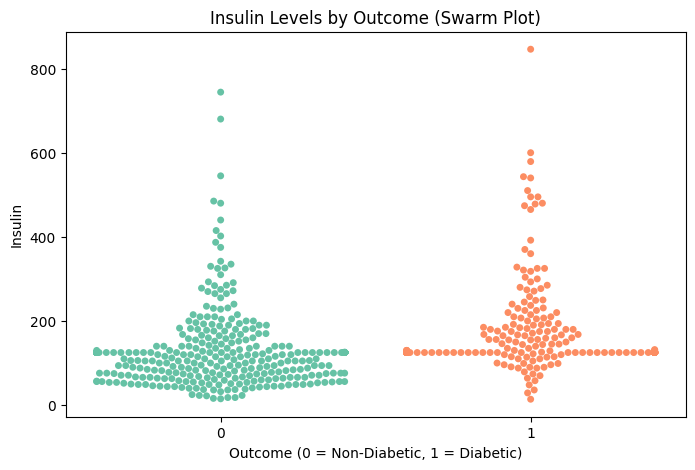

In [11]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x="Outcome", y="Insulin", data=df, palette="Set2")
plt.title("Insulin Levels by Outcome (Swarm Plot)")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Insulin")
plt.show()


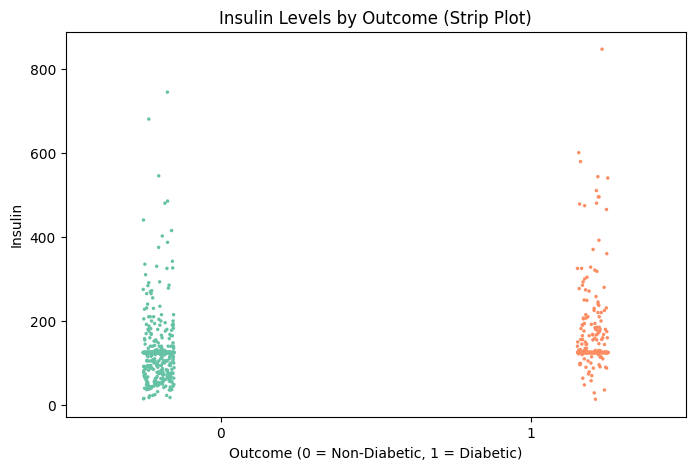

In [12]:
plt.figure(figsize=(8, 5))
sns.stripplot(x="Outcome", y="Insulin", data=df, hue="Outcome",
              palette="Set2", jitter=True, dodge=True, size=2.5)
plt.legend([], [], frameon=False)
plt.title("Insulin Levels by Outcome (Strip Plot)")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Insulin")
plt.show()


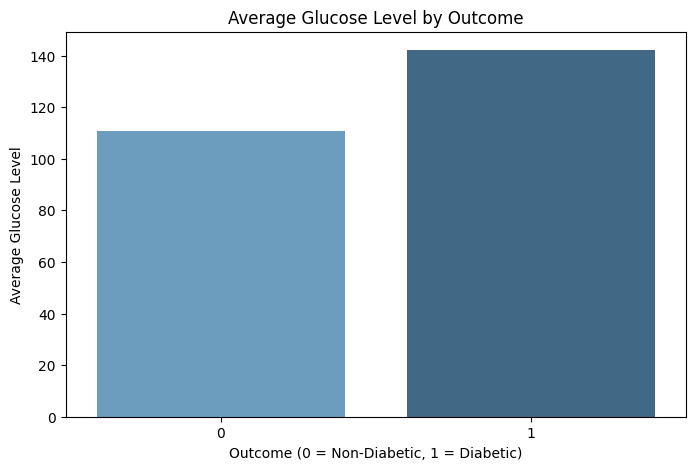

In [13]:
plt.figure(figsize=(8, 5))
mean_glucose = df.groupby("Outcome")["Glucose"].mean().reset_index()
sns.barplot(x="Outcome", y="Glucose", data=mean_glucose, hue="Outcome", palette="Blues_d")
plt.legend([], [], frameon=False)  # Remove the redundant legend
plt.title("Average Glucose Level by Outcome")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Average Glucose Level")
plt.show()


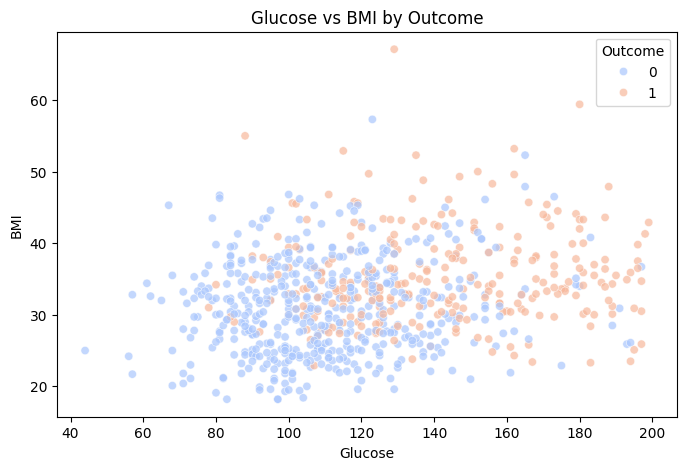

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Glucose", y="BMI", data=df, hue="Outcome", palette="coolwarm", alpha=0.7)
plt.title("Glucose vs BMI by Outcome")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Outcome", loc="upper right")
plt.show()


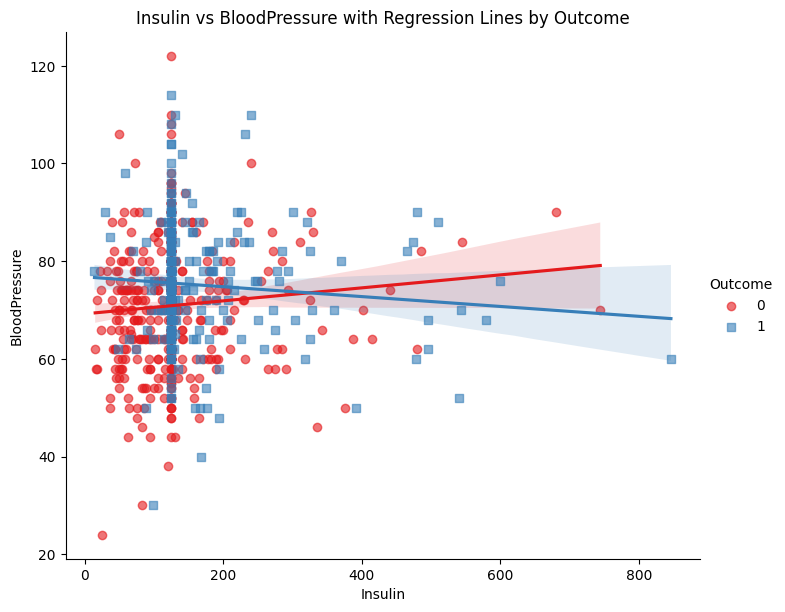

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# LM plot for Insulin vs BloodPressure with hue for Outcome
sns.lmplot(x="Insulin", y="BloodPressure", data=df, hue="Outcome", palette="Set1", height=6, aspect=1.2, markers=["o", "s"],
           scatter_kws={"alpha": 0.6})
plt.title("Insulin vs BloodPressure with Regression Lines by Outcome")
plt.xlabel("Insulin")
plt.ylabel("BloodPressure")
plt.show()


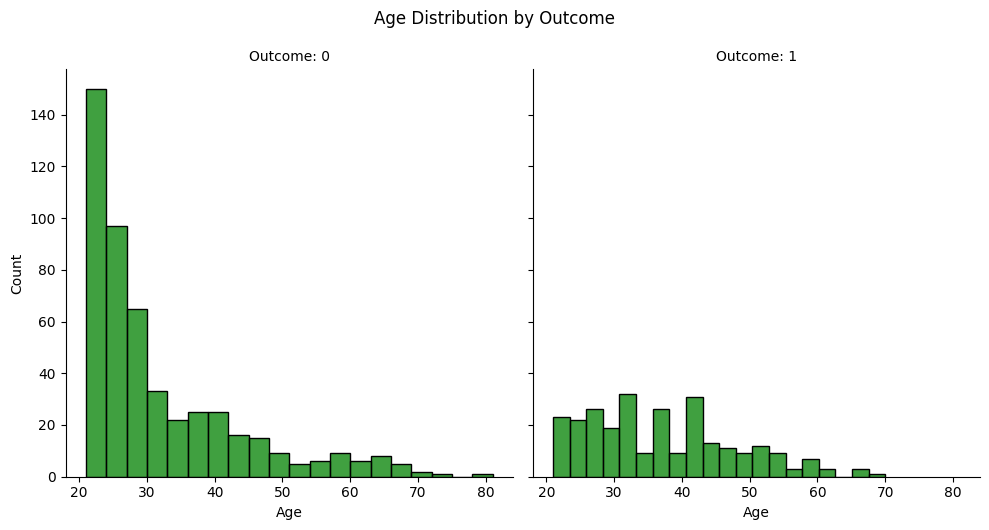

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to plot Age distribution by Outcome
g = sns.FacetGrid(df, col="Outcome", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, color="green")
g.set_titles("Outcome: {col_name}")
g.set_axis_labels("Age", "Count")
plt.suptitle("Age Distribution by Outcome", y=1.05)
plt.show()


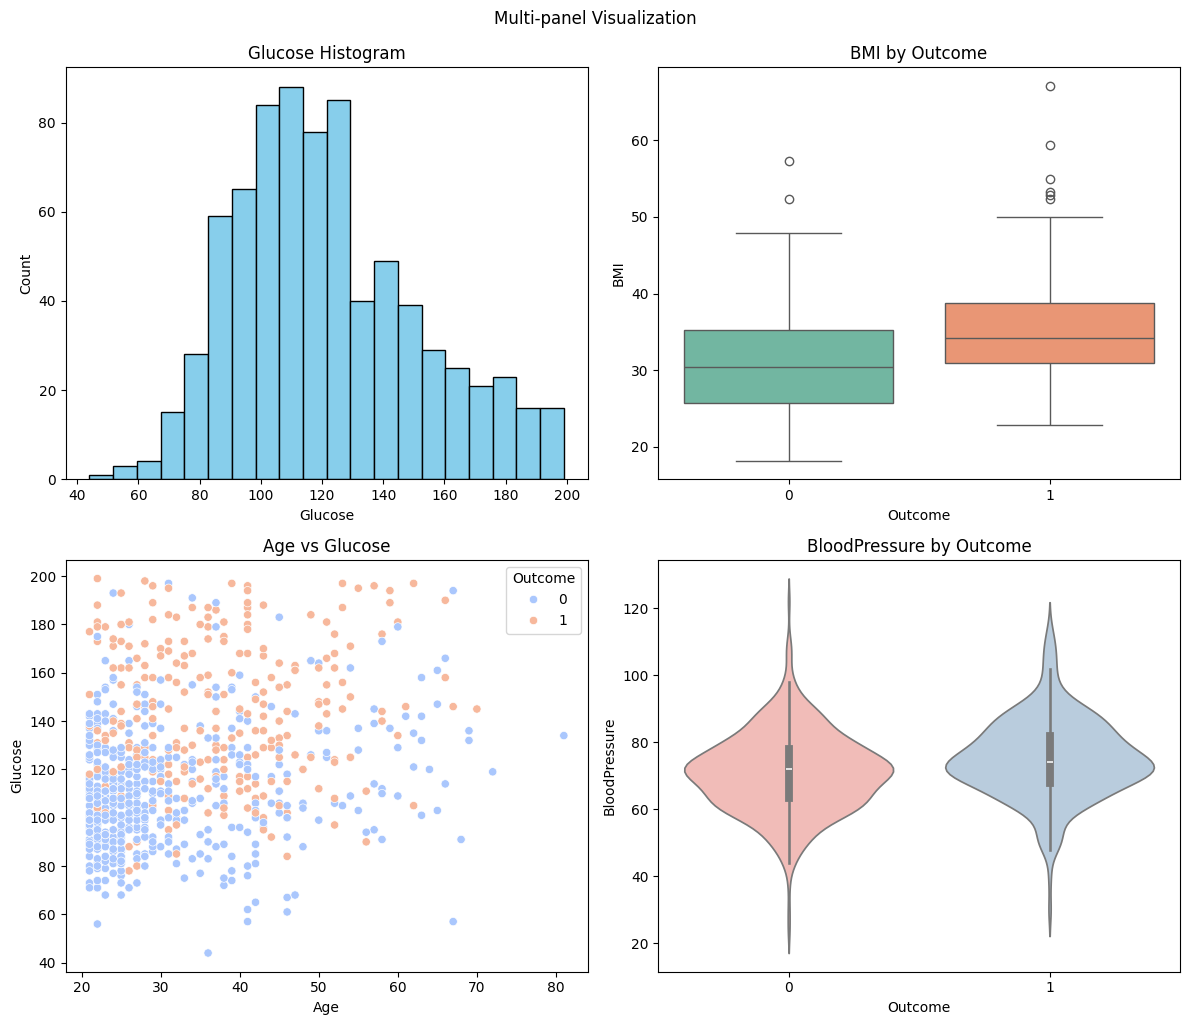

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Top-left: Histogram for Glucose
axs[0, 0].hist(df["Glucose"], bins=20, color="skyblue", edgecolor="black")
axs[0, 0].set_title("Glucose Histogram")
axs[0, 0].set_xlabel("Glucose")
axs[0, 0].set_ylabel("Count")

# Top-right: Boxplot for BMI by Outcome
sns.boxplot(x="Outcome", y="BMI", data=df, hue="Outcome", palette="Set2", ax=axs[0, 1])
axs[0, 1].legend([], [], frameon=False)  # Remove redundant legend
axs[0, 1].set_title("BMI by Outcome")

# Bottom-left: Scatter Plot for Age vs Glucose, colored by Outcome
sns.scatterplot(x="Age", y="Glucose", data=df, hue="Outcome", palette="coolwarm", ax=axs[1, 0])
axs[1, 0].set_title("Age vs Glucose")
axs[1, 0].set_xlabel("Age")
axs[1, 0].set_ylabel("Glucose")

# Bottom-right: Violin Plot for BloodPressure by Outcome
sns.violinplot(x="Outcome", y="BloodPressure", data=df, hue="Outcome", palette="Pastel1", ax=axs[1, 1])
axs[1, 1].legend([], [], frameon=False)
axs[1, 1].set_title("BloodPressure by Outcome")

plt.tight_layout()
plt.suptitle("Multi-panel Visualization", y=1.02)
plt.show()


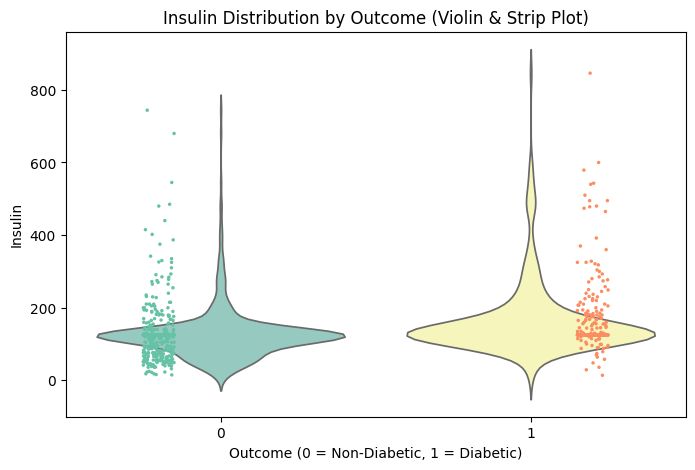

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Violin plot for Insulin by Outcome, now with hue assigned to "Outcome"
sns.violinplot(x="Outcome", y="Insulin", data=df, hue="Outcome", palette="Set3", inner=None)

# Overlay with a strip plot for individual data points
sns.stripplot(x="Outcome", y="Insulin", data=df, hue="Outcome", palette="Set2", dodge=True, jitter=True, size=2.5)

# Remove the redundant legend
plt.legend([], [], frameon=False)

plt.title("Insulin Distribution by Outcome (Violin & Strip Plot)")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Insulin")
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM, MLP, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete. Ready for modeling!")


Data preprocessing complete. Ready for modeling!


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define a dictionary of baseline models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "KNN (K=9)": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train each model and print their accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Random Forest Accuracy: 0.75
Decision Tree Accuracy: 0.72
KNN (K=9) Accuracy: 0.73
SVM Accuracy: 0.74
MLP Accuracy: 0.72


C:\Users\abhin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Polynomial feature transformation complete. New shape:", X_poly.shape)

# Split and scale the polynomial features
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)


Polynomial feature transformation complete. New shape: (768, 44)


In [22]:
# Train Random Forest on polynomial features
rf_poly = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poly.fit(X_train_poly_scaled, y_train_poly)
y_pred_poly = rf_poly.predict(X_test_poly_scaled)
accuracy_poly = accuracy_score(y_test_poly, y_pred_poly)
print(f"Random Forest Accuracy with Polynomial Features: {accuracy_poly:.2f}")


Random Forest Accuracy with Polynomial Features: 0.77


In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=9)),
    ('svm', SVC(probability=True))
]

# Use Logistic Regression as the final estimator for stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

# Train stacking model on scaled original features
stacking_model.fit(X_train_scaled, y_train)
y_pred_stack = stacking_model.predict(X_test_scaled)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Ensemble Accuracy: {accuracy_stack:.2f}")


Stacking Ensemble Accuracy: 0.74


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Random Forest Accuracy (after Grid Search): {accuracy_best:.2f}")
print("Best Parameters:", grid_search.best_params_)


Best Random Forest Accuracy (after Grid Search): 0.75
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [25]:
from sklearn.neural_network import MLPClassifier

# Increase max_iter and enable early stopping
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=True, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Optimized MLP Accuracy: {accuracy_mlp:.2f}")


Optimized MLP Accuracy: 0.71


In [26]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.2f}")


XGBoost Model Accuracy: 0.73


In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb)
print(f"Optimized XGBoost Accuracy: {accuracy_xgb_tuned:.2f}")
print("Best Parameters:", grid_search.best_params_)


Optimized XGBoost Accuracy: 0.76
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [28]:
from sklearn.ensemble import VotingClassifier

# Define the base models
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', best_xgb),  # use the best XGBoost from grid search
        ('svm', SVC(probability=True))
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Ensemble Accuracy: {accuracy_voting:.2f}")


Voting Ensemble Accuracy: 0.75


In [30]:
# Removing an unnecessary import 
from sklearn.linear_model import Ridge 
# Decided not to use Ridge regression, so removing it

## Discussion  
In this project, we aimed to predict diabetes using the PIMA Indians Diabetes dataset by applying multiple machine learning techniques. Through trial and error, we gained insights into how different preprocessing steps and models impact prediction accuracy.  

### **Key Observations & Findings**  
- **Impact of Missing Value Handling:**  
  Initially, zero values in **Glucose, BloodPressure, SkinThickness, Insulin, and BMI** affected model performance. Replacing them with the median significantly improved results.  
- **Feature Importance & Correlations:**  
  Visualizations such as heatmaps and pair plots showed that **Glucose levels had the strongest correlation with diabetes,** while features like **SkinThickness and Insulin were less influential.**  
- **Effectiveness of Polynomial Features:**  
  Adding polynomial features improved **Random Forest accuracy from 75% to 77%,** showing that some non-linear relationships were better captured this way.  
- **Hyperparameter Tuning vs. Default Models:**  
  - **Random Forest & XGBoost showed the best performance**, especially after tuning.  
  - Surprisingly, **MLP (Neural Network) performed worse than expected**, even after optimization. This suggests that with limited data, simpler models might generalize better.  

While we experimented with ensemble methods (Voting & Stacking), they did not significantly outperform the best individual model, likely due to the dataset’s small size.  

---

## Conclusion  
This project highlighted the challenges and trade-offs in machine learning-based medical predictions. The highest performance obtained was **77% accuracy** using a tuned Random Forest model with polynomial features.  

### **Challenges & Limitations:**  
- The dataset had only **768 samples**, which limited the model’s ability to generalize better.  
- Some features (like **SkinThickness and Insulin**) had unclear relationships with diabetes, making feature selection crucial.  
- The **80% accuracy target** was not fully achieved, indicating that additional techniques (or a larger dataset) might be needed for further improvement.  

### **Future Work & Improvements:**  
1. **Trying Deep Learning Approaches** – Neural networks (MLP) underperformed, but further tuning or **CNNs for image-based diabetes detection** might work better.  
2. **Feature Engineering & Selection** – Testing interaction terms or PCA to reduce redundancy could help improve performance.  
3. **Handling Class Imbalance (if any)** – Techniques like **SMOTE** could improve prediction quality by balancing the dataset.  
4. **Testing on a Larger Dataset** – A bigger and more diverse dataset might allow more complex models (like XGBoost) to perform better.  

While further improvements are possible, this project provided valuable experience in **handling medical datasets, understanding feature relationships, and optimizing machine learning models for predictive healthcare applications.**  

